In [11]:
%matplotlib widget

from utils import *

set_cache_dir('pickles/slides7')

import logging
import numpy as np
import matplotlib.pyplot as plt
import climada
import cartopy
import cartopy.crs as crs
import pickle
import warnings # To hide the warnings

# this is to hide warnings
logging.getLogger("climada").setLevel(logging.CRITICAL)
logging.getLogger(__name__).setLevel(logging.ERROR)

logging.basicConfig(level=logging.CRITICAL)

# Disable all logging
logging.disable(logging.CRITICAL)
warnings.simplefilter("ignore")

## Looking at other types of risks

Until now, all our examples were concerned with tropical cyclones. However, as mentioned in the first lecture there are many other types of Climate Risks. The mathematical framework remains the same. The differences are:
1. Hazard specification from historical data (i.e. we need the intensities on a set of centroids)
2. Impact function specification

### Tropical Cyclone Rain

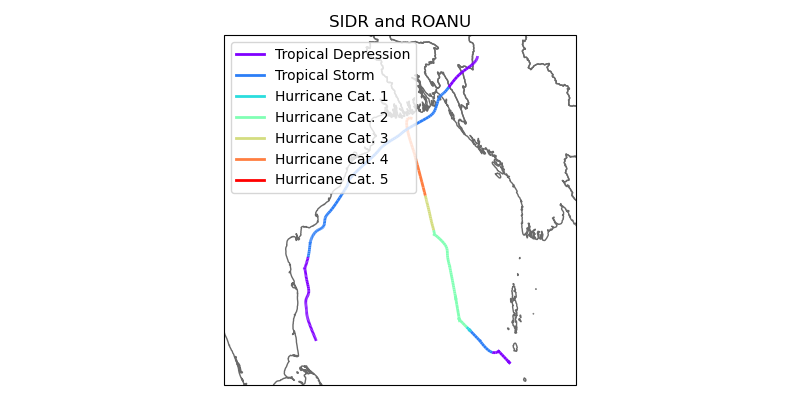

In [3]:
from climada.hazard import TCTracks

try:
    tracks = load_from_cache('tracks')
except FileNotFoundError:
    tracks = TCTracks.from_ibtracs_netcdf(
    # SIDR 2007 and ROANU 2016
    storm_id=['2007314N10093', '2016138N10081'],
    )
    tracks.equal_timestep(0.5)
    save_to_cache('tracks', tracks)



fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(projection=get_projection())
tracks.plot(axis=ax)
ax.get_legend()._loc = 2
ax.set_title('SIDR and ROANU');
fig.tight_layout()

We define centroids just like we are used to:

```python
from climada.hazard import Centroids

# define centroids and restrict to points on land
min_lat, max_lat, min_lon, max_lon = 21.0, 24.5, 88.5, 92.5
cent_bang = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.015)
```

In [4]:
from climada.hazard import Centroids

# define centroids and restrict to points on land
min_lat, max_lat, min_lon, max_lon = 21.0, 24.5, 88.5, 92.5
cent_bang = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.015)

We use the class TCRain, and its method `from_tracks`, to compute the hazard due to precipitation.

```python
from climada_petals.hazard import TCRain

tr_bang = TCRain.from_tracks(tracks, cent_bang, model="R-CLIPER")
ax = tr_bang.plot_intensity(2)
ax.set_title('Rain ROANU 2016 (from R-CLIPER)');
```

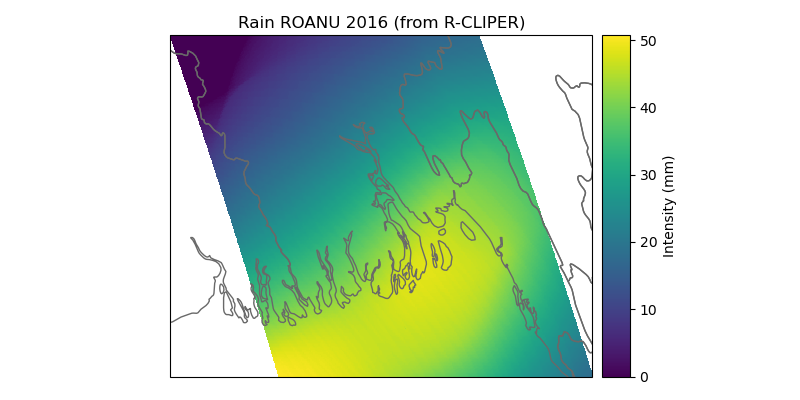

In [5]:
from climada_petals.hazard import TCRain

try:
    with open('pickles/slides7/tr_bang.pkl', 'rb') as f:
        tr_bang = pickle.load(f)
except:
    tr_bang = TCRain.from_tracks(tracks, cent_bang, model="R-CLIPER")

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(projection=get_projection())
tr_bang.plot_intensity(2, axis=ax)
ax.set_title('Rain ROANU 2016 (from R-CLIPER)');

In [14]:
with open('pickles/slides7/tr_bang.pkl', 'wb') as f:
    pickle.dump(tr_bang, f)

del tr_bang
del tracks

### Wildfire

The data used to define hazards for wildfires consists in satellite measurements of ground temperature. These data can be downloaded online. For instance, below we plot the data for one wildfire event. In Climada, we can process these data into objects of type hazard using the `WildFire` class from climada_petals.

```python
import os
import pandas as pd
from climada_petals.hazard import WildFire


# Read data
d_path = "/media/arthur/DATA/climada_data/DL_FIRE_M-C61_587390/fire_archive_M-C61_587390.csv"
firms = pd.read_csv(d_path)

# set up wildfire hazard
wf_pt = WildFire()
wf_pt.set_hist_fire_FIRMS(firms, centr_res_factor=1./2.5) # we decrease the hazard resolution to 2.5 km

# plot the maximum intensity of all fires at each centroid
wf_pt.plot_intensity(event=10);
```

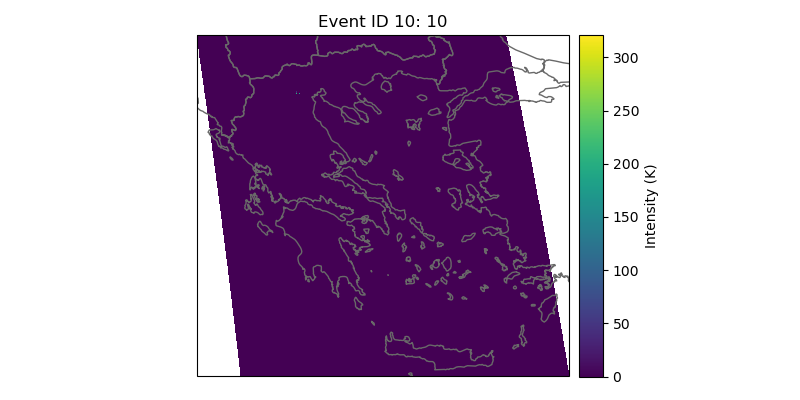

In [7]:
# Fires in Greece
import pickle
import os
import pandas as pd

from climada.util.constants import DEMO_DIR
from climada_petals.hazard import WildFire



try:
    with open('pickles/slides7/wf_pt.pkl', 'rb') as f:
        wf_pt = pickle.load(f)
except:
    # Data downloaded for MODIS
    d_path = os.path.join(DEMO_DIR, "/media/arthur/DATA/climada_data/DL_FIRE_M-C61_587390/fire_archive_M-C61_587390.csv")
    
    # read data
    firms = pd.read_csv(d_path) # FIRMS data as pandas dataframe
    
    # set up wildfire
    wf_pt = WildFire()
    wf_pt.set_hist_fire_FIRMS(firms, centr_res_factor=1/10) # we decrease the hazard resolution to 2.5 km

# plot the maximum intensity of all fires at each centroid
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(projection=get_projection())
wf_pt.plot_intensity(event=10, axis=ax);

In [9]:
import pickle
with open('./pickles/slides7/wf_pt.pkl', 'wb') as f:
    pickle.dump(wf_pt, f)

del wf_pt

Rather than looking at individual fires, we can also look at fires over whole years using the method
`set_hist_fire_seasons_FIRMS`.

<GeoAxes: title={'center': 'Event ID 2: 2001'}>

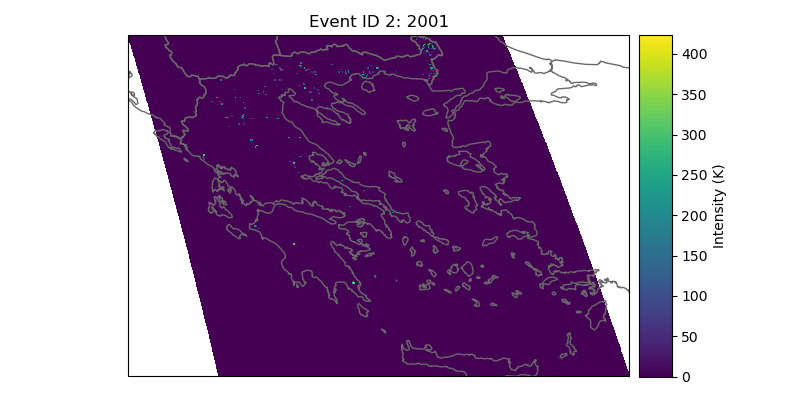

In [12]:
try:
    with open('pickles/slides7/wf_years.pkl', 'rb') as f:
        wf_years = pickle.load(f)
except:
    firms_seasons = pd.read_csv(os.path.join(DEMO_DIR, "/media/arthur/DATA/climada_data/DL_FIRE_M-C61_587390/fire_archive_M-C61_587390.csv"))
    firms_seasons = firms_seasons[firms_seasons['latitude']>35.]
    firms_seasons = firms_seasons[firms_seasons['longitude']>-12.]
    wf_years = WildFire()
    wf_years.set_hist_fire_seasons_FIRMS(firms_seasons, centr_res_factor=1/1.) # we use MODIS data resolution (1 km)


# plot the three fire seasons (2016, 2017, 2018)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(projection=crs.Orthographic())
wf_years.plot_intensity(2, axis=ax)

In [13]:
with open('./pickles/slides7/wf_years.pkl', 'wb') as f:
    pickle.dump(wf_years, f)

In [ ]:
del wf_years